In [1]:
from tsvd import *
import numpy as np
import time
import matplotlib.pyplot as plt

from tecpsgd import *
from olstec import *

0.5


/Users/kgilman/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


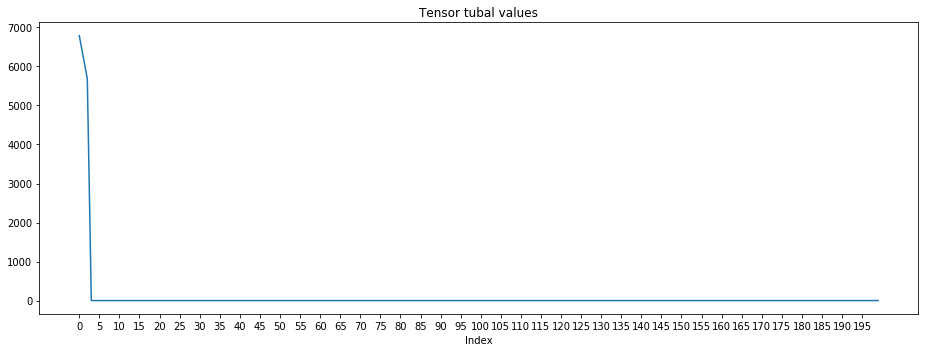

Condition number: 1.193586


In [2]:
# r =  3
# n1 = 50
# n2 = 100
# n3 = 50

# r = 5
# n1 = 100
# n2 = 500
# n3 = 100

r = 3
# r = 5
n1 = 200
n2 = 500
# n3 = 25
n3 = 20

# r =  5
# n1 = 200
# n2 = 400
# n3 = 200

np.random.seed(0)
# P = tsvd(Tensor(np.random.randn(n1,r,n3)),full=False)[0]
P = Tensor(np.random.randn(n1,n1,n3))
Utrue = Tensor(P.array()[:,:r,:])

W = Tensor(np.random.randn(r, n2, n3))
L = Utrue * W

tube = False
rho = 0.5
# rho = 0.75  # percentage of missing entries
# rho = 0.85
# rho = 1 - r*n3 / (n1*n3)
print(rho)

if(tube is False):
    mask = np.random.rand(n1, n2, n3)
    mask[mask > rho] = 1
    mask[mask <= rho] = 0
    mask = mask.astype(int)
else:
    mask = np.random.rand(n1, n2)
    mask[mask > rho] = 1
    mask[mask <= rho] = 0
    mask = mask.astype(int)
    mask = np.repeat(mask[:, :, np.newaxis], n3, axis=2)
    
sig = 0

L += Tensor(sig*np.random.randn(n1,n2,n3))

Lfrob = tfrobnorm(L)

tol = 1e-9

Ut,St,Vt = tsvd(L,full=False)
sing_vals = np.diag(St.array()[:,:,0])
plt.figure(figsize=(13,5),tight_layout=True)
plt.plot(np.arange(0,min(n1,n2)),sing_vals)
plt.xticks(np.arange(0, min(n1,n2), step=5))
plt.xlabel('Index')
plt.title('Tensor tubal values')
plt.show()

condition_num = sing_vals[0] / sing_vals[r-1]

print('Condition number: {:5f}'.format(condition_num))

# print(np.diag(St.array()[:,:,0]))

# for i in range(0,n3):
#     U,S,V = np.linalg.svd(L.array()[:,:,i],full_matrices=False)
#     plt.plot(S)
# plt.title('Frontal Slice Singular Values')
# plt.xlabel('Index')
# plt.show()

# for i in range(0,n1):
#     U,S,V = np.linalg.svd(L.array()[i,:,:],full_matrices=False)
#     plt.plot(S)
# plt.title('Horizontal Slice Singular Values')
# plt.xlabel('Index')
# plt.show()

# for i in range(0,n2):
#     U,S,V = np.linalg.svd(L.array()[:,i,:],full_matrices=False)
#     plt.plot(S)
# plt.title('Lateral Slice Singular Values')
# plt.xlabel('Index')
# plt.show()




In [3]:
# # r =  5
# # n1 = 100
# # n2 = 200
# # n3 = 100
# np.random.seed(0)

# A=np.linalg.svd(np.random.randn(n1, r),full_matrices=False)[0]
# B=np.linalg.svd(np.random.randn(n2, r),full_matrices=False)[0]
# C=np.linalg.svd(np.random.randn(n3, r),full_matrices=False)[0]

# # A=np.random.randn(n1, r) 
# # B=np.random.randn(n2, r)
# # B = B / np.linalg.norm(B,axis=0)
# # C=np.random.randn(n3, r)

# #Create observed tensor that follows PARAFAC model
# Tensor_Y_Noiseless = np.zeros((n1,n2,n3))
# for k in range(0,n3):
#     Tensor_Y_Noiseless[:,:,k]=A@np.diag(C[k,:])@B.T

# # L = Tensor(np.transpose(Tensor_Y_Noiseless,[0,2,1]))
# L = Tensor(Tensor_Y_Noiseless)
# Lfrob = tfrobnorm(L)
# print(L.shape())

# tube = True
# rho = 0.5  # percentage of missing entries

# if(tube is False):
#     mask = np.random.rand(n1, n2, n3)
#     mask[mask > rho] = 1
#     mask[mask <= rho] = 0
#     mask = mask.astype(int)
# else:
#     mask = np.random.rand(n1, n2)
#     mask[mask > rho] = 1
#     mask[mask <= rho] = 0
#     mask = mask.astype(int)
#     mask = np.repeat(mask[:, :, np.newaxis], n3, axis=2)
    
# # mask = np.transpose(mask,[0,2,1])

# # Y_m = np.reshape(Tensor_Y_Noiseless,(n1*n3,n2))
# # U,S,V = np.linalg.svd(Y_m,full_matrices=False)
# # plt.plot(S)
# # plt.xticks(np.arange(0, min(n1,n1), step=10))
# # plt.show()

# U,S,V = tsvd(L,full=False)
# sing_vals = np.diag(S.array()[:,:,0])
# plt.figure(figsize=(13,5),tight_layout=True)
# plt.plot(np.arange(0,min(n1,n2)),sing_vals)
# plt.xticks(np.arange(0, min(n1,n2), step=5))
# plt.title('Tubal singular values')
# # plt.yticks(np.arange(0,np.max(S.array()),step=500))
# plt.show()

# condition_num = sing_vals[0] / sing_vals[r-1]
# print('Condition number: {:5f}'.format(condition_num))

In [4]:
Y = Tensor(L.array() * mask)
# Tensor_Y_Noiseless = np.transpose(L.array() * mask,[0,2,1])
# # Tensor_Y_Noiseless = L.array().copy()
# rank = 100
# OmegaTensor = np.transpose(mask,[0,2,1])
# # OmegaTensor = mask.copy()

# tensor_dims = [n1,n3,n2]
# # tensor_dims = [n1,n2,n3]

In [5]:
# rank = 5
# Xinit = {
#     'A': np.random.randn(tensor_dims[0], rank),
#     'B': np.random.randn(tensor_dims[1], rank),
#     'C': np.random.randn(tensor_dims[2], rank)
# }

In [6]:
# ## TeCPSGD

# maxepochs = 5
# tolcost = 1e-14
# permute_on = False

# options = {
#     'maxepochs': maxepochs,
#     'tolcost': tolcost,
#     'lam': 0.001,
#     'stepsize': 1,
#     'permute_on':  permute_on,
#     'store_subinfo': True,
#     'store_matrix': False,
#     'verbose': True
# }


# Xsol_TeCPSGD, Y_hat_tecpsgd, info_TeCPSGD, sub_infos_TeCPSGD = TeCPSGD(Tensor_Y_Noiseless, OmegaTensor, None, tensor_dims, rank,
#                                                           Xinit, options)

# A_t0 = Xsol_TeCPSGD['A']
# B_t0 = Xsol_TeCPSGD['B']
# C_t0 = Xsol_TeCPSGD['C']

# nrmse_tecpsgd = frobnorm(Y_hat_tecpsgd - Tensor_Y_Noiseless) / frobnorm(Tensor_Y_Noiseless)
# print(nrmse_tecpsgd)

In [7]:
# ## OLSTEC

# # Tensor_Y_Noiseless = np.transpose(L.array(),[0,2,1])
# Tensor_Y_Noiseless = L.array()
# rank = 20
# # OmegaTensor = np.transpose(mask,[0,2,1])
# OmegaTensor = mask
# # tensor_dims = [n1,n3,n2]
# tensor_dims = [n1,n2,n3]
# maxepochs = 1
# tolcost = 1e-14
# permute_on = False

# options = {
#     'maxepochs': maxepochs,
#     'tolcost': tolcost,
#     'lam': 1,
#     'mu': 0.01,
#     'permute_on':  permute_on,
#     'store_subinfo': True,
#     'store_matrix': False,
#     'verbose': True,
#     'tw_flag': None,
#     'tw_len': None
# }

# np.random.seed(0)
# Xinit = {
#     'A': np.random.randn(tensor_dims[0], rank),
#     'B': np.random.randn(tensor_dims[1], rank),
#     'C': np.random.randn(tensor_dims[2], rank)
# }

# print(Tensor_Y_Noiseless.shape)
# Xsol_olstec, Y_hat_olstec, info_olstec, sub_infos_olstec = OLSTEC(Tensor_Y_Noiseless, OmegaTensor, None, tensor_dims, rank,
#                                                           Xinit, options)

# A_t0 = Xsol_olstec['A']
# B_t0 = Xsol_olstec['B']
# C_t0 = Xsol_olstec['C']

Time elapsed: Tensor: 26.378 
Final NRMSE: Tensor: 0.00000000 


/Users/kgilman/miniconda3/lib/python3.6/site-packages/matplotlib/ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


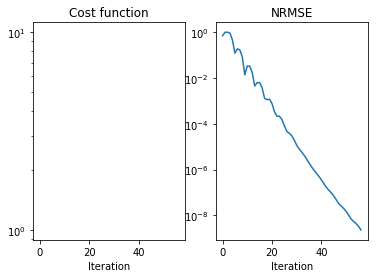

In [8]:
## TNN-ADMM

fun = lambda X: [0, tfrobnorm(X - L) / Lfrob]

niter = 200

Xhat, stats, tElapsed_tensor = lrtc(Y, mask, niter=niter,tol=tol, it_tol=tol,fun=fun)

cost_tensor = stats[:,0]
nrmse_tensor = stats[:,1]
times_tensor = stats[:,2]

print('Time elapsed: Tensor: {:.3f} '.format(tElapsed_tensor))
print('Final NRMSE: Tensor: {:.8f} '.format(nrmse_tensor[-1]))

plt.subplot(1,2,1)
plt.semilogy(cost_tensor)
plt.xlabel('Iteration')
plt.title('Cost function')
plt.subplot(1,2,2)
plt.semilogy(nrmse_tensor)
plt.xlabel('Iteration')
plt.title('NRMSE')
plt.show()

Iter[1]: NRMSE: 0.265995 
Iter[11]: NRMSE: 0.001264 
Iter[21]: NRMSE: 0.000011 
Iter[31]: NRMSE: 0.000000 
TCTF Time: 8.137397
TCTF NRMSE: 0.000000


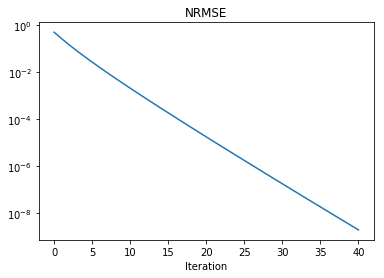

In [9]:
## TCTF

fun = lambda U,V: [0, tfrobnorm(U*V - L) / Lfrob]
Xtctf,Ztctf, stats_tctf, tElapsed_tctf = tctf(Y,mask,rank=r,niter = 250,tol=tol,it_tol=tol,fun=fun,verbose=True)
Y_hat_tctf = Xtctf * Ztctf

nrmse_tctf = stats_tctf[:,1]
times_tctf = stats_tctf[:,-1]
print('TCTF Time: {:4f}'.format(tElapsed_tctf))
print('TCTF NRMSE: {:8f}'.format(nrmse_tctf[-1]))

plt.semilogy(nrmse_tctf)
plt.xlabel('Iteration')
plt.title('NRMSE')
plt.show()


0.16367483139038086


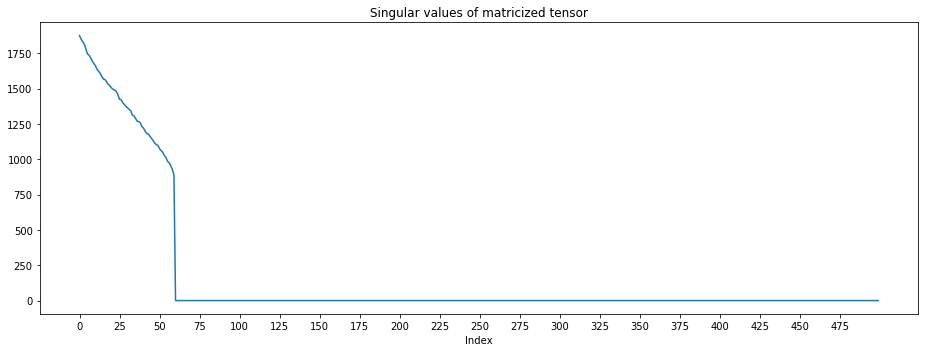

In [10]:
# ## Matrix Completion

L_m = lr_flatten(L.array())
mask_m = lr_flatten(mask)

Y_m = L_m * mask_m

start = time.time()
U,S,V = np.linalg.svd(L_m,full_matrices=False)
end = time.time()

print(end - start)
plt.figure(figsize=(13,5),tight_layout=True)

plt.plot(np.arange(0,min(n1*n3,n2)),S)
plt.xticks(np.arange(0, min(n1*n3,n2), step=25))
plt.title('Singular values of matricized tensor')
plt.xlabel('Index')
plt.show()

In [11]:
# ## Matrix Completion

cost_fun = lambda X: [0, np.linalg.norm(X - L_m, 'fro') / np.linalg.norm(L_m, 'fro')]

niter_mc = 500
Xhat_m, stats, tElapsed_matrix = lrmc(Y_m,mask_m,niter=niter_mc,fun=cost_fun)

cost_matrix = stats[:,0]
nrmse_matrix = stats[:,1]
times_matrix = stats[:,2]

print('Time elapsed: Mat Comp: {:.3f} '.format(tElapsed_matrix))
print('Final NRMSE: Mat Comp: {:.8f} '.format(nrmse_matrix[-1]))


Time elapsed: Mat Comp: 26.743 
Final NRMSE: Mat Comp: 0.00000001 


GROUSE Time: 14.587636
GROUSE NRMSE: 0.002394


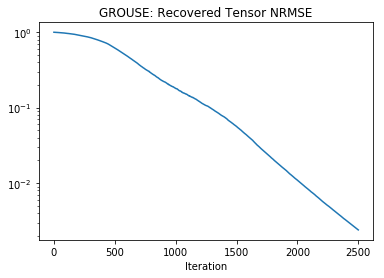

In [12]:
# ## GROUSE

rank = r*n3
# rank = r
fun = lambda X: [0, np.linalg.norm(X - L_m, 'fro') / np.linalg.norm(L_m, 'fro')]
Ym_hat_grouse, stats_grouse, tElapsed_grouse = grouse(Y_m, mask_m, rank,outer=5,mode="batch",fun=fun,randomOrder=False,
                                                      verbose=False)
grouse_nrmse = np.linalg.norm(Ym_hat_grouse - L_m,'fro') / np.linalg.norm(L_m,'fro')
print('GROUSE Time: {:4f}'.format(tElapsed_grouse))
print('GROUSE NRMSE: {:4f}'.format(grouse_nrmse))
        
nrmse_grouse = stats_grouse[:,1]
times_grouse = stats_grouse[:,-1]
tElapsed_grouse = np.sum(times_grouse)
plt.semilogy(nrmse_grouse)
plt.title('GROUSE: Recovered Tensor NRMSE')
plt.xlabel('Iteration')
plt.show()

In [13]:
## TOUCAN
# Y = Tensor(L.array() * mask)

fun = lambda X,k: [0, tfrobnorm(X - L) / Lfrob]
# fun = lambda X,k: [0, tfrobnorm_array(X.array()[:,k,:] - L.array()[:,k,:]) / tfrobnorm_array(L.array()[:,k,:])]
Y_hat_toucan, U, stats_toucan, tElapsed_toucan = toucan(Y,mask,rank=r,tube=tube,outer=7,mode="batch",tol=tol,cgiter = None,cgtol=tol,fun=fun,
                                                     randomOrder=False,verbose=False)

toucan_nrmse = tfrobnorm(Y_hat_toucan - L) / Lfrob
print('TOUCAN Time: {:4f}'.format(tElapsed_toucan))
print('TOUCAN NRMSE: {:8f}'.format(toucan_nrmse))

nrmse_toucan = stats_toucan[:,1]
cgiter_toucan = stats_toucan[:,2]
times_toucan = stats_toucan[:,-1]

TOUCAN Time: 5.823210
TOUCAN NRMSE: 0.000000


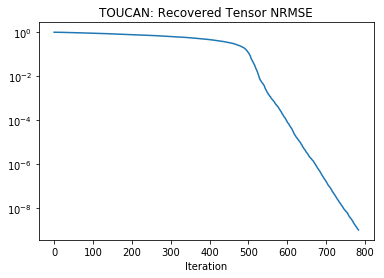

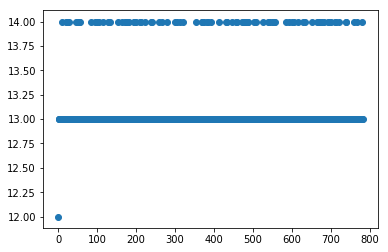

In [14]:
plt.semilogy(nrmse_toucan)
plt.title('TOUCAN: Recovered Tensor NRMSE')
plt.xlabel('Iteration')
plt.show()

plt.scatter(np.arange(0,len(cgiter_toucan[1:])),cgiter_toucan[1:])
plt.show()

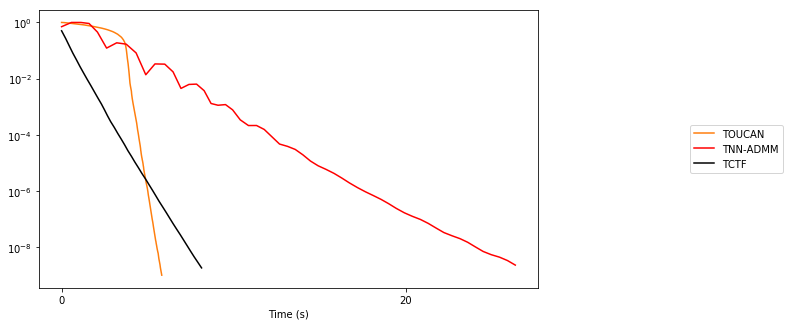

In [15]:
plt.figure(figsize=(13,5),tight_layout=True)
plt.semilogy(np.cumsum(times_toucan), nrmse_toucan, '#ff7f0e', label='TOUCAN')
#              np.cumsum(times_grouse)[:int(0.5*len(times_grouse))], nrmse_grouse[:int(0.5*len(times_grouse))], 'b',
#              np.cumsum(times_grouse), nrmse_grouse, 'b',
#             np.cumsum(times_matrix), nrmse_matrix, 'g',label='MatComp',
plt.semilogy(np.cumsum(times_tensor), nrmse_tensor, 'r', label='TNN-ADMM')
plt.semilogy(np.cumsum(times_tctf), nrmse_tctf, 'k',label='TCTF')

# max_time = max(max(np.cumsum(times_matrix)),max(np.cumsum(times_tctf)),max(np.cumsum(times_grouse)),max(np.cumsum(times_tensor)),max(np.cumsum(times_toucan)))
max_time = max(max(np.cumsum(times_tctf)),max(np.cumsum(times_tensor)),max(np.cumsum(times_toucan)))
plt.xlabel('Time (s)')
plt.xticks(np.arange(0, max_time, step=20))
plt.legend(bbox_to_anchor=(1.5,0.5),loc='center right')
plt.rcParams.update({'font.size': 22})

if(tube is False):
    name = 'nrmse_times_rand_sample_' + str(r) + '-' + str(n1) + '-' + str(n2) + '-' + str(n3) + '-' + str(int(rho*100)) + '%.eps'
else:
    name = 'nrmse_times_tube_sample_' + str(r) + '-' + str(n1) + '-' + str(n2) + '-' + str(n3) + '-' + str(int(rho*100)) + '%.eps'
# plt.savefig(name)
plt.show()

In [16]:
# plt.semilogy(np.arange(0,len(nrmse_toucan)),nrmse_toucan, '#ff7f0e',
#              np.arange(0,len(nrmse_grouse)), nrmse_grouse, 'b',
#              np.arange(0,len(nrmse_tensor)), nrmse_tensor, 'r',
#              np.arange(0,len(nrmse_matrix)), nrmse_matrix, 'g')
# plt.xlabel('Iteration')
# plt.title('NRMSE')
# plt.legend(('TOUCAN','GROUSE','TNN','MatComp'))
# # plt.legend(('TOUCAN','TC'))
# plt.show()

In [17]:
tube = True
# rho = rho  # percentage of missing entries
# rho = 1 - r*n3 / (n1*n3)

if(tube is False):
    mask = np.random.rand(n1, n2, n3)
    mask[mask > rho] = 1
    mask[mask <= rho] = 0
    mask = mask.astype(int)
else:
    mask = np.random.rand(n1, n2)
    mask[mask > rho] = 1
    mask[mask <= rho] = 0
    mask = mask.astype(int)
    mask = np.repeat(mask[:, :, np.newaxis], n3, axis=2)
    
Y = Tensor(L.array() * mask)

Time elapsed: Tensor: 26.468 
Final NRMSE: Tensor: 0.00000000 


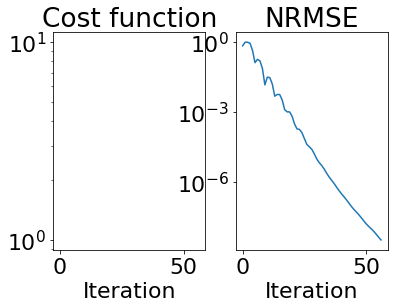

In [21]:
## TNN-ADMM

fun = lambda X: [0, tfrobnorm(X - L) / Lfrob]

niter = 200

Xhat, stats, tElapsed_tensor = lrtc(Y, mask, niter=niter,tol=tol,it_tol=tol, fun=fun)

cost_tensor_tube = stats[:,0]
nrmse_tensor_tube = stats[:,1]
times_tensor_tube = stats[:,2]

print('Time elapsed: Tensor: {:.3f} '.format(tElapsed_tensor))
print('Final NRMSE: Tensor: {:.8f} '.format(nrmse_tensor_tube[-1]))

plt.subplot(1,2,1)
plt.semilogy(cost_tensor_tube)
plt.xlabel('Iteration')
plt.title('Cost function')
plt.subplot(1,2,2)
plt.semilogy(nrmse_tensor_tube)
plt.xlabel('Iteration')
plt.title('NRMSE')
plt.show()

Iter[1]: NRMSE: 0.267446 
Iter[11]: NRMSE: 0.001890 
Iter[21]: NRMSE: 0.000033 
Iter[31]: NRMSE: 0.000001 
Iter[41]: NRMSE: 0.000000 
TCTF Time: 9.550259
TCTF NRMSE: 0.000000


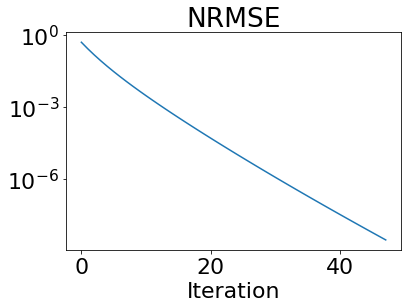

In [22]:
## TCTF

fun = lambda U,V: [0, tfrobnorm(U*V - L) / Lfrob]
Xtctf,Ztctf, stats_tctf, tElapsed_tctf = tctf(Y,mask,rank=r,niter = 150,tol=tol,it_tol=tol,fun=fun,verbose=True)
Y_hat_tctf = Xtctf * Ztctf

nrmse_tctf_tube = stats_tctf[:,1]
times_tctf_tube = stats_tctf[:,-1]
print('TCTF Time: {:4f}'.format(tElapsed_tctf))
print('TCTF NRMSE: {:8f}'.format(nrmse_tctf_tube[-1]))

plt.semilogy(nrmse_tctf_tube)
plt.xlabel('Iteration')
plt.title('NRMSE')
plt.show()



In [23]:
## Matrix Completion

cost_fun = lambda X: [0, np.linalg.norm(X - L_m, 'fro') / np.linalg.norm(L_m, 'fro')]

niter_mc = 500
Xhat_m, stats, tElapsed_matrix = lrmc(Y_m,mask_m,niter=niter_mc,fun=cost_fun)

cost_matrix = stats[:,0]
nrmse_matrix_tube = stats[:,1]
times_matrix_tube = stats[:,2]

print('Time elapsed: Mat Comp: {:.3f} '.format(tElapsed_matrix))
print('Final NRMSE: Mat Comp: {:.8f} '.format(nrmse_matrix_tube[-1]))



Time elapsed: Mat Comp: 27.314 
Final NRMSE: Mat Comp: 0.00000001 


GROUSE Time: 29.167361
GROUSE NRMSE: 0.000004


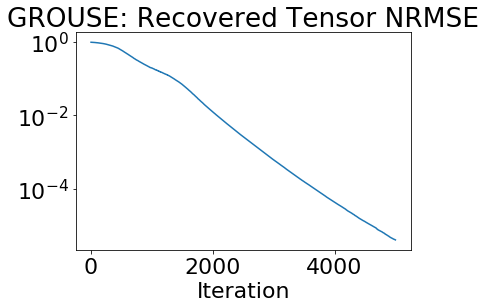

In [24]:
## GROUSE

rank = r*n3
# rank = r
fun = lambda X: [0, np.linalg.norm(X - L_m, 'fro') / np.linalg.norm(L_m, 'fro')]
Ym_hat_grouse, stats_grouse, tElapsed_grouse = grouse(Y_m, mask_m, rank,outer=10,mode="batch",fun=fun,randomOrder=False,
                                                      verbose=False)
grouse_nrmse = np.linalg.norm(Ym_hat_grouse - L_m,'fro') / np.linalg.norm(L_m,'fro')
print('GROUSE Time: {:4f}'.format(tElapsed_grouse))
print('GROUSE NRMSE: {:4f}'.format(grouse_nrmse))
        
nrmse_grouse_tube = stats_grouse[:,1]
times_grouse_tube = stats_grouse[:,-1]
tElapsed_grouse = np.sum(times_grouse)
plt.semilogy(nrmse_grouse_tube)
plt.title('GROUSE: Recovered Tensor NRMSE')
plt.xlabel('Iteration')
plt.show()

In [25]:
## TOUCAN
# Y = Tensor(L.array() * mask)

fun = lambda X,k: [0, tfrobnorm(X - L) / Lfrob]
# fun = lambda X,k: [0, tfrobnorm_array(X - L.array()[:,k,:]) / tfrobnorm_array(L.array()[:,k,:])]
Y_hat_toucan, U, stats_toucan, tElapsed_toucan = toucan(Y,mask,rank=r,tube=tube,outer=5,mode="batch",tol=tol,cgiter = None,cgtol=tol,fun=fun,
                                                     randomOrder=False,verbose=False)

toucan_nrmse = tfrobnorm(Y_hat_toucan - L) / Lfrob
print('TOUCAN Time: {:4f}'.format(tElapsed_toucan))
print('TOUCAN NRMSE: {:8f}'.format(toucan_nrmse))

nrmse_toucan_tube = stats_toucan[:,1]
cgiter_toucan = stats_toucan[:,2]
times_toucan_tube = stats_toucan[:,-1]

TOUCAN Time: 2.157052
TOUCAN NRMSE: 0.000000


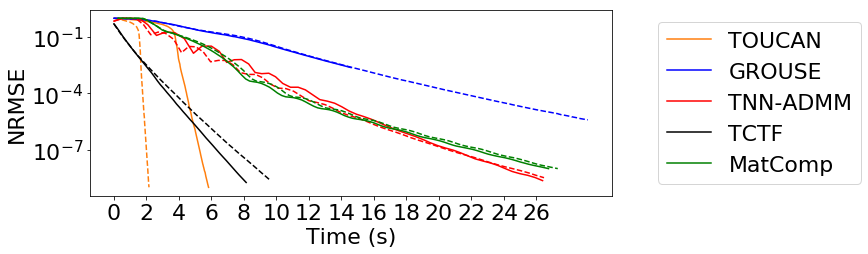

In [26]:
plt.figure(figsize=(13,4),tight_layout=True)
plt.semilogy(np.cumsum(times_toucan), nrmse_toucan, '#ff7f0e',label='TOUCAN')
plt.semilogy(np.cumsum(times_toucan_tube), nrmse_toucan_tube, '#ff7f0e',linestyle='--',label='TOUCAN')
plt.semilogy(np.cumsum(times_grouse), nrmse_grouse, 'b',label='GROUSE')
plt.semilogy(np.cumsum(times_grouse_tube), nrmse_grouse_tube, 'b',linestyle='--',label='GROUSE')
plt.semilogy(np.cumsum(times_tensor), nrmse_tensor, 'r',label='TNN-ADMM')
plt.semilogy(np.cumsum(times_tensor_tube), nrmse_tensor_tube, 'r',linestyle='--',label='TNN-ADMM')
plt.semilogy(np.cumsum(times_tctf), nrmse_tctf, 'k',label='TCTF')
plt.semilogy(np.cumsum(times_tctf_tube), nrmse_tctf_tube, 'k',linestyle='--',label='TCTF')
plt.semilogy(np.cumsum(times_matrix), nrmse_matrix, 'g',label='MatComp')
plt.semilogy(np.cumsum(times_matrix_tube), nrmse_matrix_tube, 'g',linestyle="--",label='Matcomp')

max_time = max(max(np.cumsum(times_matrix)),max(np.cumsum(times_tctf)),max(np.cumsum(times_tensor)),max(np.cumsum(times_grouse)))
# max_time = max(max(np.cumsum(times_tctf)),max(np.cumsum(times_tensor)),max(np.cumsum(times_toucan)))
plt.xlabel('Time (s)')
plt.ylabel('NRMSE')
# plt.xticks(np.arange(0, max_time, step=10))
plt.xticks(np.arange(0, max_time, step=2))
handles, labels = plt.gca().get_legend_handles_labels()
ids = [0,2,4,6,8]
# ids = [0,2,4]
handles = [handles[i] for i in ids]
labels = [labels[i] for i in ids]
plt.legend(handles, labels, bbox_to_anchor=(1.5,0.5),loc='center right')
plt.rcParams.update({'font.size': 22})

if(tube is False):
    name = 'nrmse_times_rand_sample_' + str(r) + '-' + str(n1) + '-' + str(n2) + '-' + str(n3) + '-' + str(int(rho*100)) + '%.eps'
else:
    name = 'nrmse_times_tube_sample_' + str(r) + '-' + str(n1) + '-' + str(n2) + '-' + str(n3) + '-' + str(int(rho*100)) + '%.eps'
plt.savefig(name)
plt.show()

### Dynamically changing free submodule in time

In [ ]:
# ### Synthetic data sizes
# ranks = [2, 4, 6, 8]
# # ranks = [2, 4]
# # ranks = [1, 3, 5, 7]
# num_vec = 2000
# tube = False
# n1 = 50
# n3 = 10
# rho = 0.3
# sig = 0

# stats_toucan = np.zeros((len(ranks),num_vec))

# plt.figure(figsize=(12,4),tight_layout=True)
# ax = plt.subplot(111)

# if(tube is True):
#     name = 'nrmse_tracking_tube_sample-' + str(n1) + '-' + str(n3) + '-' + str(int(rho*100)) + '%.eps'
# else:
#     name = 'nrmse_tracking_rand_sample-' + str(n1) + '-' + str(n3) + '-' + str(int(rho*100)) + '%.eps'

# for rank in range(0,len(ranks)):

#     r = ranks[rank]

#     ### Initialize U
#     np.random.seed(10)
#     K = r
#     U = tsvd(Tensor(np.random.randn(n1,r,n3)),full=False)[0]
#     U = Tensor(U.array()[:,:K,:])

#     tStart = time.time()
#     iter = 0
#     for t in range(0,num_vec):

#         if(t % 500 == 0):
#             P = tsvd(Tensor(np.random.randn(n1,r,n3)),full=False)[0]
#             Utrue = Tensor(P.array()[:,:r,:])
#             Utrue_frob = tfrobnorm(Utrue * Utrue.T())

#         Wtrue = Tensor(np.random.randn(r, 1, n3))
#         Yvec = Utrue * Wtrue + Tensor(sig * np.random.randn(n1,1,n3))
        
#         if(tube): #Tubal sampling
#             mask = np.random.rand(n1, 1)
#             mask[mask > rho] = 1
#             mask[mask <= rho] = 0
#             mask = mask.astype(int)
#             mask = np.repeat(mask[:, :, np.newaxis], n3, axis=2)
#             idx = np.where(mask[:,0,0] > 0)[0]
            
#             tStart = time.time()
#             U,w = toucan_stream_tube(Yvec,idx,U)
#             tEnd = time.time()
#             tElapsed = tEnd - tStart
        
#         else: #random entry sampling
#             mask = np.random.rand(n1, n3)
#             mask[mask > rho] = 1
#             mask[mask <= rho] = 0
#             mask = mask.astype(int)
            
#             tStart = time.time()
#             U,w,cg_iters = toucan_stream(Yvec,mask,U)
#             tEnd = time.time()
#             tElapsed = tEnd - tStart

#         stats_toucan[rank,iter] = tfrobnorm(Utrue * Utrue.T() - U * U.T()) / Utrue_frob
#         iter += 1

#         nrmse_toucan = stats_toucan[rank,:]

#     ax.semilogy(stats_toucan[rank,:],label='$rank = %r$'%r)
# # ax.set_title('TOUCAN: Free Submodule Error')
# ax.set_xlabel('Iteration')
# ax.set_ylabel('NRMSE')
# # Shrink current axis by 20%
# # box = ax.get_position()
# # ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# # Put a legend to the right of the current axis
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.rcParams.update({'font.size': 22})
# plt.savefig(name)
# plt.show()

In [ ]:
# from cp_wopt import *
from tecpsgd import *
from tsvd import *


In [ ]:
# r = 1
r = 2
# r = 5
# r =  10
n1 = 100
n2 = 100
n3 = 100
np.random.seed(0)
# L = synth_tensor(r,n1,n2,n3)

# A=np.random.randn(n1, r) 
# A = A / np.linalg.norm(A,axis=0)
# B=np.random.randn(n2, r)
# B = B / np.linalg.norm(B,axis=0)
# C=np.random.randn(n3, r)
# C = C / np.linalg.norm(C,axis=0)

A=np.random.randn(n1, r)
B=np.random.randn(n2, r)
C=np.random.randn(n3, r)

#Create observed tensor that follows PARAFAC model
L_cp = np.zeros((n1,n2,n3))
for k in range(0,n3):
    L_cp[:,:,k]=A@np.diag(C[k,:])@B.T

tube = False
rho = 0.5  # percentage of missing entries
# rho = 1 - r*n3 / (n1*n3)
print(rho)

if(tube is False):
    mask = np.random.rand(n1, n2, n3)
    mask[mask > rho] = 1
    mask[mask <= rho] = 0
    mask = mask.astype(int)
else:
    mask = np.random.rand(n1, n2)
    mask[mask > rho] = 1
    mask[mask <= rho] = 0
    mask = mask.astype(int)
    mask = np.repeat(mask[:, :, np.newaxis], n3, axis=2)
    
sig = 0

L_cp += sig*np.random.randn(n1,n2,n3)

L_cp_frob = tfrobnorm(Tensor(L_cp))

In [ ]:

### TeCPSGD

# Tensor_Y_Noiseless = np.transpose(L.array(),[0,2,1])
Tensor_Y_Noiseless = L_cp.copy()
rank = r
# OmegaTensor = np.transpose(mask,[0,2,1])
OmegaTensor = mask.copy()
# tensor_dims = [n1,n3,n2]
tensor_dims = [n1,n2,n3]
maxepochs = 5
tolcost = 1e-14
permute_on = False

options = {
    'maxepochs': maxepochs,
    'tolcost': tolcost,
    'lam': 0.001,
    'stepsize': 0.5,
#     'mu': 0.05,
    'permute_on':  permute_on,
    'store_subinfo': True,
    'store_matrix': False,
    'verbose': True
}

fun = lambda X: np.sqrt(np.sum((X - L_cp)**2)) / L_cp_frob

Xinit = {
    'A': np.random.randn(tensor_dims[0], rank),
    'B': np.random.randn(tensor_dims[1], rank),
    'C': np.random.randn(tensor_dims[2], rank)
}


Xsol_TeCPSGD, Y_hat_tecpsgd, info_TeCPSGD, sub_infos_TeCPSGD = TeCPSGD(Tensor_Y_Noiseless, OmegaTensor, None, tensor_dims, rank,
                                                          Xinit, options,fun=fun)

A_t0 = Xsol_TeCPSGD['A']
B_t0 = Xsol_TeCPSGD['B']
C_t0 = Xsol_TeCPSGD['C']


nrmse_tecpsgd = sub_infos_TeCPSGD['error'][1:]

# idx = np.where(nrmse_tecpsgd > tol)[0]
# nrmse_tecpsgd = nrmse_tecpsgd[idx]
times_tecpsgd = sub_infos_TeCPSGD['times'][1:]
# times_tecpsgd = times_tecpsgd[idx]


In [ ]:
tol = 1e-9
idx = np.where(nrmse_tecpsgd > tol)[0]
nrmse_tecpsgd = nrmse_tecpsgd[idx]
times_tecpsgd = times_tecpsgd[idx]

In [ ]:
### OLSTEC

from olstec import *

rank = r
maxepochs = 5
tolcost = 1e-14
permute_on = False

options = {
    'maxepochs': maxepochs,
    'tolcost': tolcost,
    'lam': 1,
    'stepsize': 0.7,
    'mu': 0.01,
    'permute_on':  permute_on,
    'store_subinfo': True,
    'store_matrix': False,
    'verbose': True,
    'tw_flag': None,
    'tw_len': None
}

np.random.seed(0)
Xinit = {
    'A': np.random.randn(tensor_dims[0], rank),
    'B': np.random.randn(tensor_dims[1], rank),
    'C': np.random.randn(tensor_dims[2], rank)
}

print(Tensor_Y_Noiseless.shape)
Xsol_olstec, Y_hat_olstec, info_olstec, sub_infos_olstec = OLSTEC(Tensor_Y_Noiseless, OmegaTensor, None, tensor_dims, rank,
                                                          Xinit, options, fun=fun)

A_t0 = Xsol_olstec['A']
B_t0 = Xsol_olstec['B']
C_t0 = Xsol_olstec['C']

nrmse_olstec = sub_infos_olstec['error'][1:]
times_olstec = sub_infos_olstec['times'][1:]

In [ ]:
### STC

## Sequential Tensor Completion
from stc import *
Tensor_Y = Tensor_Y_Noiseless.copy()
Mask_Y = OmegaTensor.copy()
numcycles = 1
outer = 7
r1 = r
r2 = r
r3 = r

fun = lambda X, k: [0,np.sqrt(np.sum((X - L_cp)**2)) / L_cp_frob]

Lhat_stc, stats_stc, tElapsed_stc = stc(Tensor_Y,Mask_Y,r1,r2,r3,outer,numcycles,tol=tol,fun=fun,verbose=True)

# nrmse_stc = frobnorm_array(Lhat_stc - L_cp) / L_cp_frob
print('STC Time: {:4f}'.format(tElapsed_stc))
# print('NRMSE STC: {:6f}'.format(nrmse_stc))


In [ ]:
nrmse_stc = stats_stc[:,1]
idx = np.where(nrmse_stc > 0)
nrmse_stc = nrmse_stc[idx]
times_stc = stats_stc[:,-1][idx]

In [ ]:
### TOUCAN
tol = 1e-9

fun = lambda X,k: [0,tfrobnorm(X - L) / Lfrob]
L = Tensor(np.transpose(L_cp,(0,2,1)))
Lfrob = tfrobnorm(L)
mask_t = np.transpose(mask,(0,2,1)) 
Y = Tensor(L.array() * mask_t)
# fun = lambda X,k: [0, tfrobnorm_array(X - L.array()[:,k,:]) / tfrobnorm_array(L.array()[:,k,:])]
Y_hat_toucan, U, stats_toucan, tElapsed_toucan = toucan(Y,mask_t,rank=r,tube=tube,outer=3,mode="online",tol=tol,cgiter = None,cgtol=tol,fun=fun,
                                                     randomOrder=False,verbose=True)

toucan_nrmse = tfrobnorm(Y_hat_toucan - L) / Lfrob
print('TOUCAN Time: {:4f}'.format(tElapsed_toucan))
print('TOUCAN NRMSE: {:8f}'.format(toucan_nrmse))

nrmse_toucan = stats_toucan[:,1]
cgiter_toucan = stats_toucan[:,2]
times_toucan = stats_toucan[:,-1]

In [ ]:
### TNN-ADMM

fun = lambda X: [0, tfrobnorm(X - L) / Lfrob]
niter = 150
Xhat, stats, tElapsed_tensor = lrtc(Y, mask_t, niter=niter,tol=tol, fun=fun, verbose = True)

cost_tnn = stats[:,0]
nrmse_tnn = stats[:,1]
times_tnn = stats[:,2]

print('Time elapsed: Tensor: {:.3f} '.format(tElapsed_tensor))
print('Final NRMSE: Tensor: {:.8f} '.format(nrmse_tnn[-1]))

plt.subplot(1,2,1)
plt.semilogy(cost_tnn)
plt.xlabel('Iteration')
plt.title('Cost function')
plt.subplot(1,2,2)
plt.semilogy(nrmse_tnn)
plt.xlabel('Iteration')
plt.title('NRMSE')
plt.show()

In [ ]:
### TCTF

fun = lambda U,V: [0, tfrobnorm(U*V - L) / Lfrob]
Xtctf,Ztctf, stats_tctf, tElapsed_tctf = tctf(Y,mask_t,rank=r,niter = 200,tol=tol,fun=fun,verbose=True)
Y_hat_tctf = Xtctf * Ztctf

nrmse_tctf = stats_tctf[:,1]
times_tctf = stats_tctf[:,-1]
print('TCTF Time: {:4f}'.format(tElapsed_tctf))
print('TCTF NRMSE: {:8f}'.format(nrmse_tctf[-1]))

plt.semilogy(nrmse_tctf)
plt.xlabel('Iteration')
plt.title('NRMSE')
plt.show()

In [ ]:
# L_m = lr_flatten(L_cp)
L_m = np.reshape(L_cp,(n1*n2,n3))
# mask_m = lr_flatten(mask)
mask_m = np.reshape(mask,(n1*n2,n3))

Y_m = L_m * mask_m

In [ ]:
## Matrix Completion

cost_fun = lambda X: [0, np.linalg.norm(X - L_m, 'fro') / np.linalg.norm(L_m, 'fro')]

niter_mc = 200
Xhat_m, stats, tElapsed_matrix = lrmc(Y_m,mask_m,niter=niter_mc,fun=cost_fun)

cost_matrix = stats[:,0]
nrmse_matrix = stats[:,1]
times_matrix = stats[:,2]

print('Time elapsed: Mat Comp: {:.3f} '.format(tElapsed_matrix))
print('Final NRMSE: Mat Comp: {:.8f} '.format(nrmse_matrix[-1]))



In [ ]:
## GROUSE

rank = r
fun = lambda X: [0, np.linalg.norm(X - L_m, 'fro') / np.linalg.norm(L_m, 'fro')]
Ym_hat_grouse, stats_grouse, tElapsed_grouse = grouse(Y_m, mask_m, rank,outer=20,mode="batch",fun=fun,randomOrder=False,
                                                      verbose=False)
grouse_nrmse = np.linalg.norm(Ym_hat_grouse - L_m,'fro') / np.linalg.norm(L_m,'fro')
print('GROUSE Time: {:4f}'.format(tElapsed_grouse))
print('GROUSE NRMSE: {:4f}'.format(grouse_nrmse))
        
nrmse_grouse = stats_grouse[:,1]
times_grouse = stats_grouse[:,-1]
tElapsed_grouse = np.sum(times_grouse)
plt.semilogy(nrmse_grouse)
plt.title('GROUSE: Recovered Tensor NRMSE')
plt.xlabel('Iteration')
plt.show()

In [ ]:
plt.figure(figsize=(13,5),tight_layout=True)
plt.semilogy(np.cumsum(times_toucan),nrmse_toucan,'#ff7f0e',label='TOUCAN')
plt.semilogy(np.cumsum(times_tecpsgd),nrmse_tecpsgd,'#00FFFF',label='TeCPSGD')
plt.semilogy(np.cumsum(times_olstec),nrmse_olstec,'#8B008B',label='OLSTEC')
plt.semilogy(np.cumsum(times_tnn),nrmse_tnn,'r',label='TNN-ADMM')
plt.semilogy(np.cumsum(times_tctf),nrmse_tctf,'k',label='TCTF')
plt.semilogy(np.cumsum(times_stc),nrmse_stc,'#FF007F',label='STC')
plt.semilogy(np.cumsum(times_matrix),nrmse_matrix,'g',label='MatComp')
plt.semilogy(np.cumsum(times_grouse),nrmse_grouse,'b',label='GROUSE')
plt.xlabel('Time (s)')
plt.ylabel('NRMSE')
plt.legend(bbox_to_anchor=(1.5,0.5),loc='center right')
plt.rcParams.update({'font.size': 22})
name = 'cp_synth_' + np.str(r) + '-' + np.str(n1) + '-' + np.str(n2) + '-' + np.str(n3) + '_' + np.str(rho * 100) + '.png'
plt.savefig(name)
plt.show()